In [1]:
#Bibliotecas
import requests
from PIL import Image
from matplotlib.pyplot import imshow
from io import StringIO
import json
import matplotlib.pyplot as plt
from PIL import ImageFont
from PIL import ImageDraw

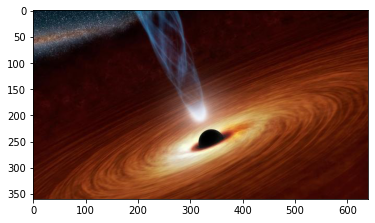

In [17]:
def open_image(uri: str):
  response = requests.get(uri, allow_redirects=True)
  headers = response.headers
  len = int(headers["Content-Length"])
  # print(response)
  # print(len)
  # print(response.text)
  if len > 5_000_000:
    print(f"Ignoring {len}")
    return None

  image = Image.open(requests.get(uri, stream=True).raw)
  hsv_image = image.convert(mode = "HSV")
  return hsv_image

imshow(open_image("https://images-assets.nasa.gov/image/PIA16695/PIA16695~thumb.jpg"))

In [42]:
def parse(word, amount=16):
  uri = f"https://images-api.nasa.gov/search?q={word}&page=1&media_type=image&year_start=1920&year_end=2021"

  result = requests.get(uri)
  content = result.text

  io = StringIO(content)
  images = json.load(io)["collection"]["items"]

  links_to_images = []
  for image in images[:amount]:
    href = image["href"]

    content = requests.get(href).text
    links = json.load(StringIO(content))
    links_to_images.append(links[0])

  images = []
  for uri in links_to_images:
    image = open_image(uri)
    if image:
      images.append(image)

  return images

Ignoring 8418495
Ignoring 7259531
Ignoring 11924918


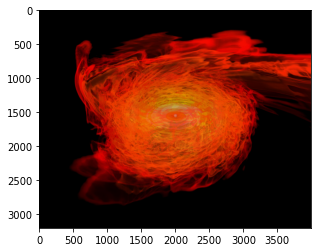

In [40]:
imshow(parse("blackhole")[2])

Ignoring 8418495
Ignoring 7259531
Ignoring 11924918


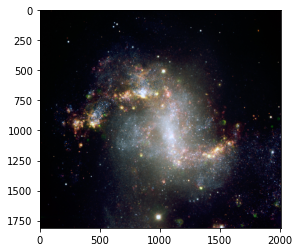

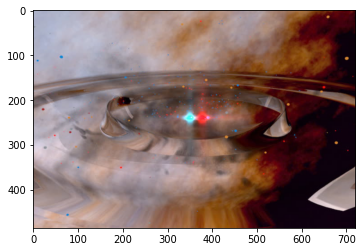

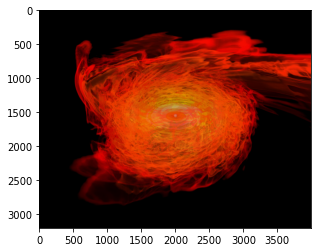

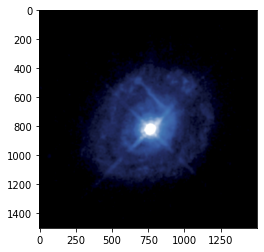

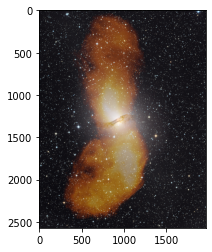

In [43]:
def imshows(images):
  for image in images:
    plt.figure()
    plt.imshow(image)

blackholes = parse("blackhole")
imshows(blackholes)

In [44]:
# https://stackoverflow.com/questions/43734194/pillow-create-thumbnail-by-cropping-instead-of-preserving-aspect-ratio

class _Image(Image.Image):

    def crop_to_aspect(self, aspect, divisor=1, alignx=0.5, aligny=0.5):
        """Crops an image to a given aspect ratio.
        Args:
            aspect (float): The desired aspect ratio.
            divisor (float): Optional divisor. Allows passing in (w, h) pair as the first two arguments.
            alignx (float): Horizontal crop alignment from 0 (left) to 1 (right)
            aligny (float): Vertical crop alignment from 0 (left) to 1 (right)
        Returns:
            Image: The cropped Image object.
        """
        if self.width / self.height > aspect / divisor:
            newwidth = int(self.height * (aspect / divisor))
            newheight = self.height
        else:
            newwidth = self.width
            newheight = int(self.width / (aspect / divisor))
        img = self.crop((alignx * (self.width - newwidth),
                         aligny * (self.height - newheight),
                         alignx * (self.width - newwidth) + newwidth,
                         aligny * (self.height - newheight) + newheight))
        return img

Image.Image.crop_to_aspect = _Image.crop_to_aspect

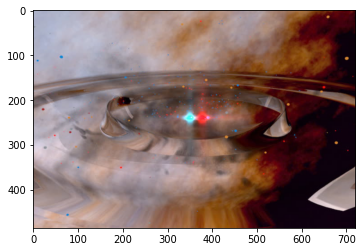

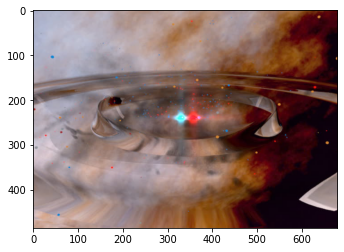

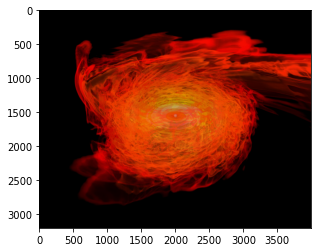

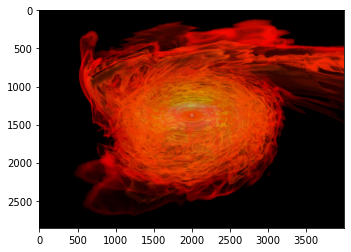

In [45]:
ASPECT = 7 / 5

def crop(img, aspect=ASPECT):
  return img.crop_to_aspect(aspect)

imshows([blackholes[1], crop(blackholes[1])])
imshows([blackholes[2], crop(blackholes[2])])

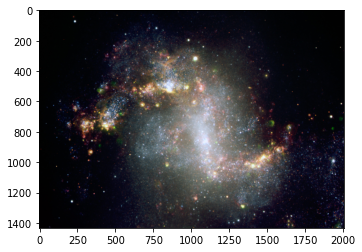

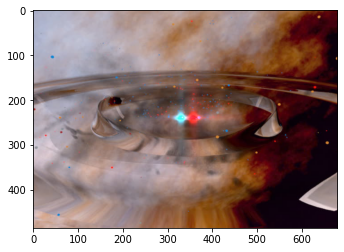

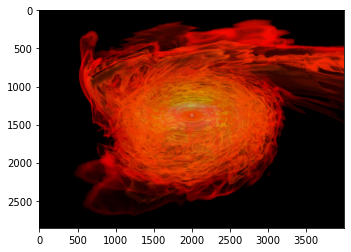

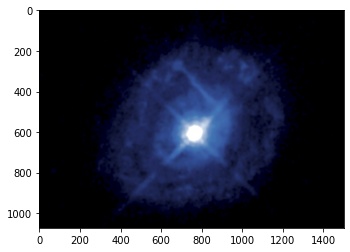

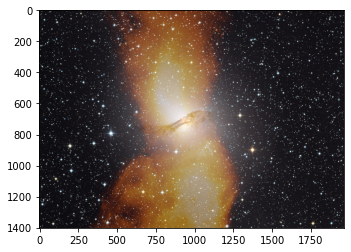

In [36]:
cropped_blackholes = [crop(image) for image in blackholes]
imshows(cropped_blackholes)

In [9]:
!wget https://github.com/guilhermesilveira/memory-game/blob/main/Roboto-Regular.ttf?raw=true

--2021-12-23 19:42:04--  https://github.com/guilhermesilveira/memory-game/blob/main/Roboto-Regular.ttf?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/guilhermesilveira/memory-game/raw/main/Roboto-Regular.ttf [following]
--2021-12-23 19:42:04--  https://github.com/guilhermesilveira/memory-game/raw/main/Roboto-Regular.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/guilhermesilveira/memory-game/main/Roboto-Regular.ttf [following]
--2021-12-23 19:42:04--  https://raw.githubusercontent.com/guilhermesilveira/memory-game/main/Roboto-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199

In [10]:
def get_font_for(img: Image, text: str, image_fraction=0.15):
  font_path = "Roboto-Regular.ttf?raw=true"
  font_size = 1
  font = ImageFont.truetype(font_path, size=font_size)

  breakpoint = image_fraction * img.size[1]
  jumpsize = 75
  while True:
    if font.getsize(text)[1] < breakpoint:
        font_size += jumpsize
    else:
        jumpsize = jumpsize // 2
        font_size -= jumpsize
    font = ImageFont.truetype(font_path, font_size)
    if jumpsize <= 1:
        break

  return font

In [11]:
def write(img: Image, text: str):
  font = get_font_for(img, text)

  new_image = img.copy()
  draw = ImageDraw.Draw(new_image)

  text_width, _ = draw.textsize(text, font)

  size = new_image.size
  position = ((size[0] - text_width) / 2, 0)

  draw.text(position, text = text, fill=(0,0,255), font=font)

  return new_image

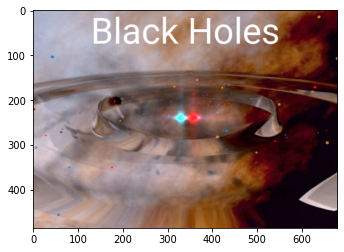

In [24]:
imshow(write(cropped_blackholes[1], "Black Holes"))

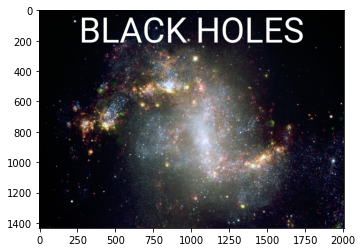

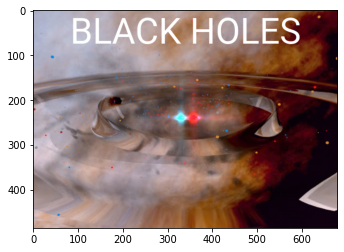

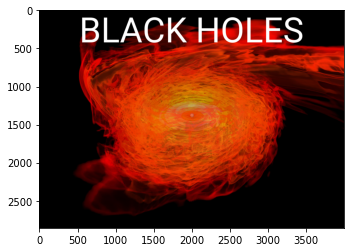

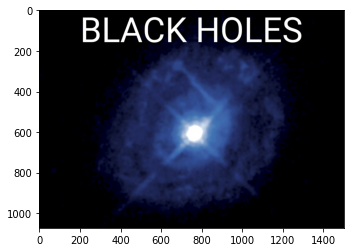

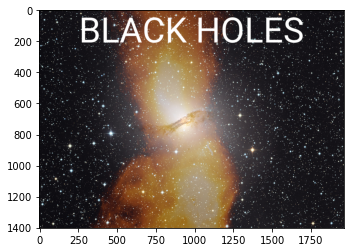

In [25]:
written_blackholes = [write(image, "BLACK HOLES") for image in cropped_blackholes]
imshows(written_blackholes)

In [14]:
from google.colab import files

def download_images(images, text: str):
  for i, image in enumerate(images):
    name = f"{text}-{i}.png"
    img = image.copy()
    img = img.convert("RGB")
    img.save(name)
    files.download(name)

In [ ]:
#download_images(written_saturns, "SATURN")